##  PROJECT 2
$\color{red}{\text{Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. }}$
Submit $\color{red}{\text{only}}$ your jupyter notebook file  to elearn. Any email submission will not be accepted.

In this project, you will analyze local and global temperature data and compare the temperature trends of some cities to global temperature trends. Given the dataset for the annual average temperatures for the cities, find the city, the average temperature distribution of which was the most similar to the global average temperature distribution. Check only for these cites to simplfy the project:  'Nashville', 'London', 'Paris', 'New York', 'Moscow', 'Stockholm'

In [212]:
#include all the modules here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

In [229]:
# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
temp_data = pd.read_csv(r"/content/sample_data/temp.csv")
temp_data.style.highlight_null(null_color='red')
temp_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [214]:
# Create a new data frame with the data of these cities only: 'Global', 'Nashville', 'London', 'Paris', 'New York', 'Moscow', 'Stockholm'
cities = ['Global', 'Nashville','London','Paris','New York','Moscow','Stockholm']
temp_data_cities = temp_data[temp_data["city"].isin(cities)]
temp_data_cities

,year,city,country,avg_temp
22553,1750,Global,Global,8.72
22554,1751,Global,Global,7.98
22555,1752,Global,Global,5.78
22556,1753,Global,Global,8.39
22557,1754,Global,Global,8.47
...,...,...,...,...
61298,2009,Stockholm,Sweden,7.54
61299,2010,Stockholm,Sweden,6.01
61300,2011,Stockholm,Sweden,8.18
61301,2012,Stockholm,Sweden,7.21


In [215]:
# Take only the data for the years between 1769 and 2013
temp_data_cities = temp_data_cities[temp_data_cities["year"].between(1759, 2013)]
temp_data_cities

,year,city,country,avg_temp
22562,1759,Global,Global,7.99
22563,1760,Global,Global,7.19
22564,1761,Global,Global,8.77
22565,1762,Global,Global,8.61
22566,1763,Global,Global,7.50
...,...,...,...,...
61298,2009,Stockholm,Sweden,7.54
61299,2010,Stockholm,Sweden,6.01
61300,2011,Stockholm,Sweden,8.18
61301,2012,Stockholm,Sweden,7.21


In [216]:
# Format your frame such that index will be the years, columns will be the cities and values will be the avg_temp
temp_data_cities_pivot = temp_data_cities.pivot_table(index='year', columns='city', values='avg_temp')
temp_data_cities_pivot

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,8.595,3.45,13.83,9.01,10.66,6.58
1760,7.19,7.615,2.41,12.28,7.73,10.50,5.62
1761,8.77,9.025,4.14,14.77,10.18,10.55,6.88
1762,8.61,8.420,4.10,14.27,9.55,10.06,6.23
1763,7.50,7.145,2.91,12.20,7.23,9.83,5.61
...,...,...,...,...,...,...,...
2009,9.51,9.450,5.69,14.62,10.14,11.46,7.54
2010,9.70,9.425,5.91,15.05,11.36,10.41,6.01
2011,9.52,10.255,6.01,15.46,11.27,12.33,8.18


In [217]:
# Fill the null data with the previous value
temp_data_cities_pivot.fillna(method='pad')
temp_data_cities_pivot

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.99,8.595,3.45,13.83,9.01,10.66,6.58
1760,7.19,7.615,2.41,12.28,7.73,10.50,5.62
1761,8.77,9.025,4.14,14.77,10.18,10.55,6.88
1762,8.61,8.420,4.10,14.27,9.55,10.06,6.23
1763,7.50,7.145,2.91,12.20,7.23,9.83,5.61
...,...,...,...,...,...,...,...
2009,9.51,9.450,5.69,14.62,10.14,11.46,7.54
2010,9.70,9.425,5.91,15.05,11.36,10.41,6.01
2011,9.52,10.255,6.01,15.46,11.27,12.33,8.18


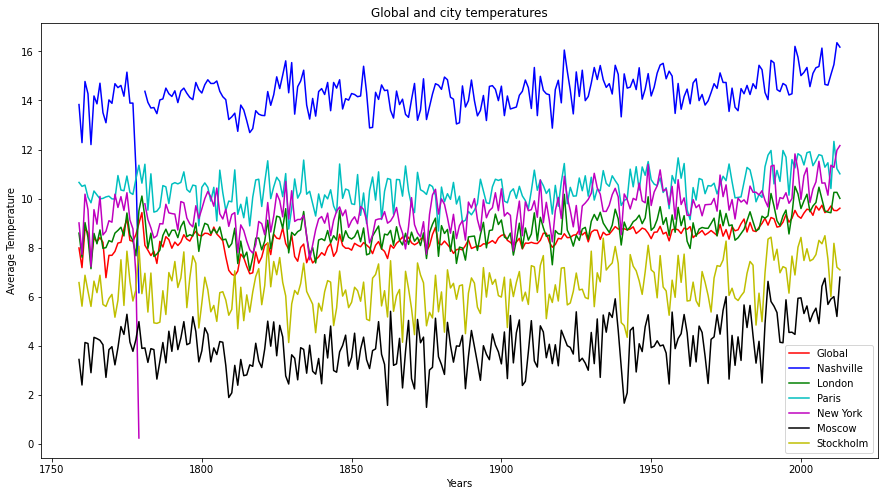

In [218]:
# Draw all the global and city temperatures on the same plot
variables = ['y_glo','y_nas','y_lon','y_par','y_ny','y_mos','y_sto']
colors = ['r','b','g','c','m','k','y']
plt.rcParams["figure.figsize"] = [15,8]

def getYAxis(city):
  return np.array(temp_data_cities_pivot[city])

x = np.array(temp_data_cities_pivot.index)
for (variable,city,color) in zip(variables,cities,colors):
  variable = getYAxis(city)
  plt.plot(x,variable,color, label = city )

plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title('Global and city temperatures')
plt.rcParams["legend.shadow"]
plt.legend(loc='best')

In [219]:
# Find the correlation matrix
temp_data_pivot_corr = temp_data_cities_pivot.corr()
temp_data_pivot_corr

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.724737,0.622445,0.451521,0.527859,0.519043,0.461624
London,0.724737,1.000000,0.555459,0.576483,0.653880,0.748117,0.654391
Moscow,0.622445,0.555459,1.000000,0.260949,0.341410,0.537684,0.782200
Nashville,0.451521,0.576483,0.260949,1.000000,0.876680,0.195107,0.221847
New York,0.527859,0.653880,0.341410,0.876680,1.000000,0.289190,0.283029
Paris,0.519043,0.748117,0.537684,0.195107,0.289190,1.000000,0.717602
Stockholm,0.461624,0.654391,0.782200,0.221847,0.283029,0.717602,1.000000


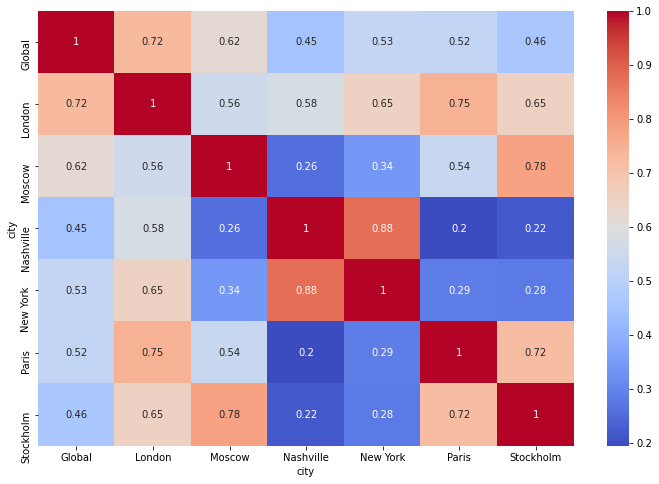

In [220]:
# Use seaborn heatmap to see the correlations
plt.rcParams["figure.figsize"] = [12,8]
ax = sns.heatmap(temp_data_pivot_corr, annot=True, cmap='coolwarm')

Text(0.5, 1.02, "JointPlot showing Global vs Nashville's average temperature")

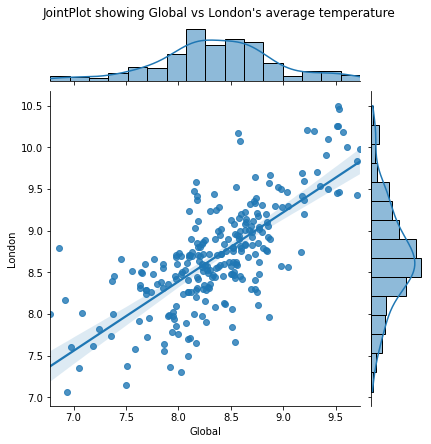

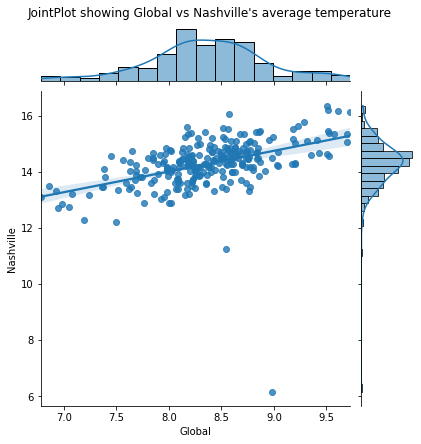

In [221]:
# Draw twp subplots to show the correlations of the cities
p = sns.jointplot(x='Global', y='London', data=temp_data_cities_pivot, kind = 'reg')
p.fig.suptitle("JointPlot showing Global vs London's average temperature", y=1.02)

p = sns.jointplot(x='Global', y='Nashville', data=temp_data_cities_pivot, kind = 'reg')
p.fig.suptitle("JointPlot showing Global vs Nashville's average temperature", y=1.02)

In [222]:
# Second part the project, use rolling window caluculations and calculate the correlations again.
temp_data_cities_pivot = temp_data_cities_pivot.rolling(window=7,min_periods=1).mean()
print("Dataframe after rolling windows calculation")
temp_data_cities_pivot

Dataframe after rolling windows calculation


city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
year,,,,,,,
1759,7.990000,8.595000,3.450000,13.830000,9.010000,10.660000,6.580000
1760,7.590000,8.105000,2.930000,13.055000,8.370000,10.580000,6.100000
1761,7.983333,8.411667,3.333333,13.626667,8.973333,10.570000,6.360000
1762,8.140000,8.413750,3.525000,13.787500,9.117500,10.442500,6.327500
1763,8.012000,8.160000,3.402000,13.470000,8.740000,10.320000,6.184000
...,...,...,...,...,...,...,...
2009,9.535714,9.771429,5.662857,15.110000,10.548571,11.582857,7.885714
2010,9.560000,9.765714,5.794286,15.180000,10.765714,11.368571,7.678571
2011,9.588571,9.845000,5.892857,15.231429,10.891429,11.510000,7.771429


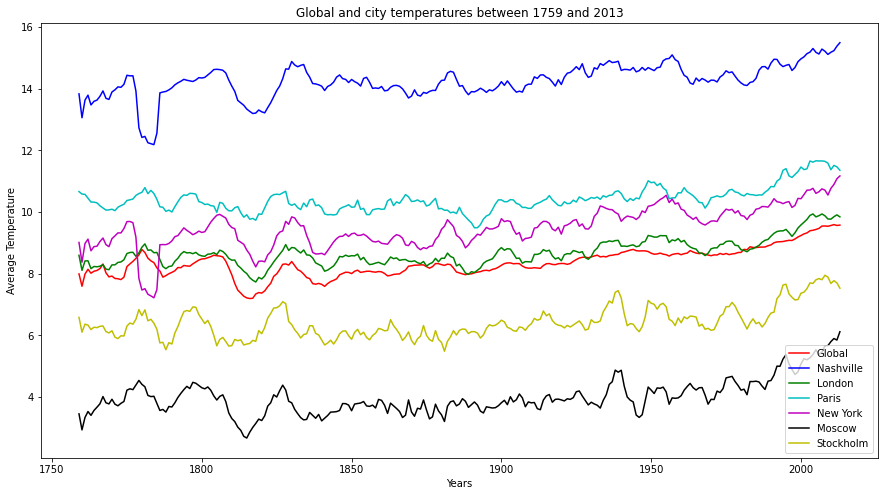

In [223]:
# Draw all the global and city temperatures on the same plot
plt.rcParams["figure.figsize"] = [15,8]

def getYAxis(city):
  return np.array(temp_data_cities_pivot[city])

x = np.array(temp_data_cities_pivot.index)
for (variable,city,color) in zip(variables,cities,colors):
  variable = getYAxis(city)
  plt.plot(x,variable,color, label = city )

plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title('Global and city temperatures between 1759 and 2013')
plt.rcParams["legend.shadow"]
plt.legend(loc='best')

In [224]:
# Find the correlation matrix
temp_data_pivot_corr = temp_data_cities_pivot.corr()
temp_data_pivot_corr

city,Global,London,Moscow,Nashville,New York,Paris,Stockholm
city,,,,,,,
Global,1.000000,0.908227,0.866730,0.630850,0.733527,0.814887,0.748984
London,0.908227,1.000000,0.835661,0.699163,0.781976,0.899912,0.830847
Moscow,0.866730,0.835661,1.000000,0.550114,0.638444,0.817926,0.878831
Nashville,0.630850,0.699163,0.550114,1.000000,0.926070,0.485337,0.496330
New York,0.733527,0.781976,0.638444,0.926070,1.000000,0.593493,0.589784
Paris,0.814887,0.899912,0.817926,0.485337,0.593493,1.000000,0.876083
Stockholm,0.748984,0.830847,0.878831,0.496330,0.589784,0.876083,1.000000


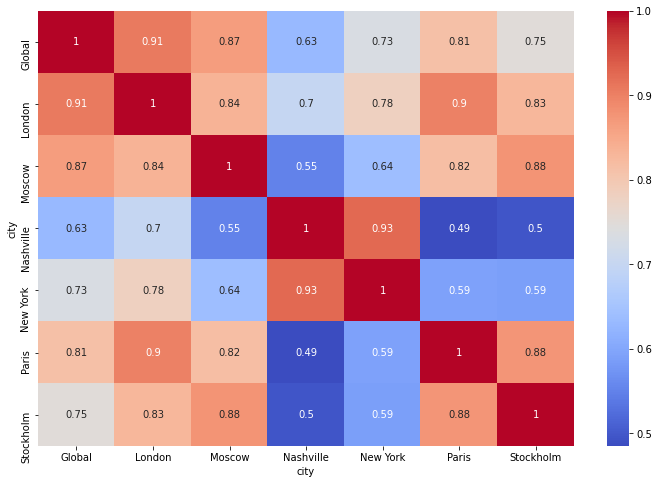

In [225]:
# Use seaborn heatmap to see the correlations
plt.rcParams["figure.figsize"] = [12,8]
ax = sns.heatmap(temp_data_pivot_corr, annot=True, cmap='coolwarm')

Text(0.5, 1.02, "JointPlot showing Global vs Nashville's average temperature")

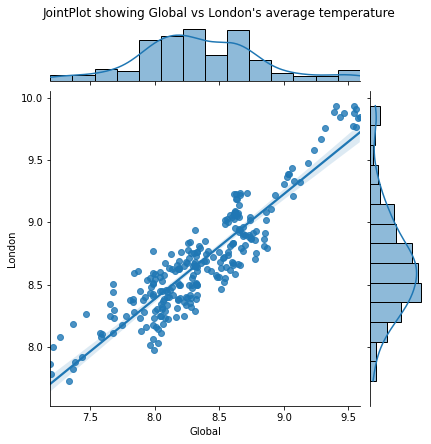

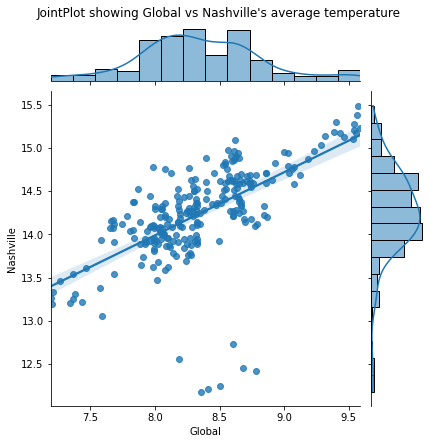

In [226]:
# Draw twp subplots to show the correlations of the cities
p = sns.jointplot(x='Global', y='London', data=temp_data_cities_pivot, kind = 'reg')
p.fig.suptitle("JointPlot showing Global vs London's average temperature", y=1.02)

p = sns.jointplot(x='Global', y='Nashville', data=temp_data_cities_pivot, kind = 'reg')
p.fig.suptitle("JointPlot showing Global vs Nashville's average temperature", y=1.02)

In [227]:
# This section is only for the graduate students.
# Write a code that finds the city that has the highest correlation with the global temperature
def findCityWithHighestCorr(data):
  arr = np.array(data.to_numpy())
  num = np.unique(arr)[-2]
  val = temp_data_pivot_corr.columns[(temp_data_pivot_corr == num).any(1)]
  return val[1]

glo_data = temp_data_pivot_corr["Global"]
city= findCityWithHighestCorr(glo_data)
print(city)


London


In [228]:
temp_data_pivot = temp_data.pivot_table(index='year', columns='city', values='avg_temp')
corr_data = temp_data_pivot.fillna(0).corr()
glo_data = corr_data["Global"]
def findMaxCorr(data):
  arr = np.array(data.to_numpy())
  num = np.unique(arr)[-2]
  val = corr_data.columns[(corr_data == num).any(1)]
  return val[1]

city = findMaxCorr(glo_data)
print(city)

Perm
